In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
file_names = os.listdir('./data/database/')

In [3]:
target_size = (400,400)
color = True

In [4]:
images = [ cv2.resize(cv2.imread('./data/database/'+str(path),int(color)), target_size) for path in file_names ]

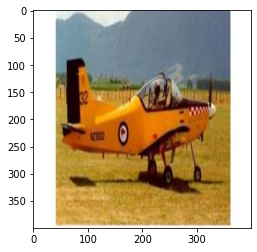

In [5]:
plt.figure()
img2 = cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB )
plt.imshow(img2)
plt.show()

## HOG

In [6]:
hog = cv2.HOGDescriptor()

In [7]:
hogs = [ hog.compute(im) for im in images ]

In [52]:
def top_5(name, sorted_indexes, file_names=file_names):
    count = 0
    for img_index in sorted_indexes[:5] :
        if file_names[img_index].startswith(name):
            count+=1
    return count/5

def top_1(name, sorted_indexes, file_names=file_names):
    if file_names[sorted_indexes[0]].startswith(name):
        return 1
    return 0

In [56]:
def calculate_accuracy(database_hogs, distance_function):
    top1 = 0
    top5 = 0
    query_all = []
    sorted_indexes_all = []
    names = ["airplane", "ball", "car", "cat", "dolphin", "face", "lotus", "pickles"]
    for name in names:
        query = cv2.resize(cv2.imread('./data/'+str(name)+'_query.jpg', int(color)), target_size)
        query_all.append(query)
        query_hog = hog.compute(query)
        distances = distance_function(database_hogs, query_hog)
        sorted_indexes = np.argsort(distances)
        sorted_indexes_all.append(sorted_indexes)
        top1 += top_1(name, sorted_indexes)
        top5 += top_5(name, sorted_indexes)
    return top1/len(names), top5/len(names), sorted_indexes_all, query_all

In [92]:
def euclidean_distance(database_hogs, query_hog):
    return [np.linalg.norm(database-query_hog) for database in hogs]

def cosine_distance(database_hogs, query_hog):
    return [cosine_similarity(database.reshape(1, -1),query_hog.reshape(1, -1))[0][0] for database in hogs]

def scalar_product(database_hogs, query_hog):
    return [np.dot(database,query_hog) for database in hogs]

def correlation(database_hogs, query_hog):
    return [np.correlate(database,query_hog)[0] for database in hogs]

## pairwise distances ?

In [96]:
top1, top5, sorted_images_all, query_all = calculate_accuracy(hogs, euclidean_distance)

In [97]:
print("Top 1 accuracy is : " + str(top1) + "%")
print("Top 5 accuracy is : " + str(top5) + "%")

Top 1 accuracy is : 0.75%
Top 5 accuracy is : 0.55%


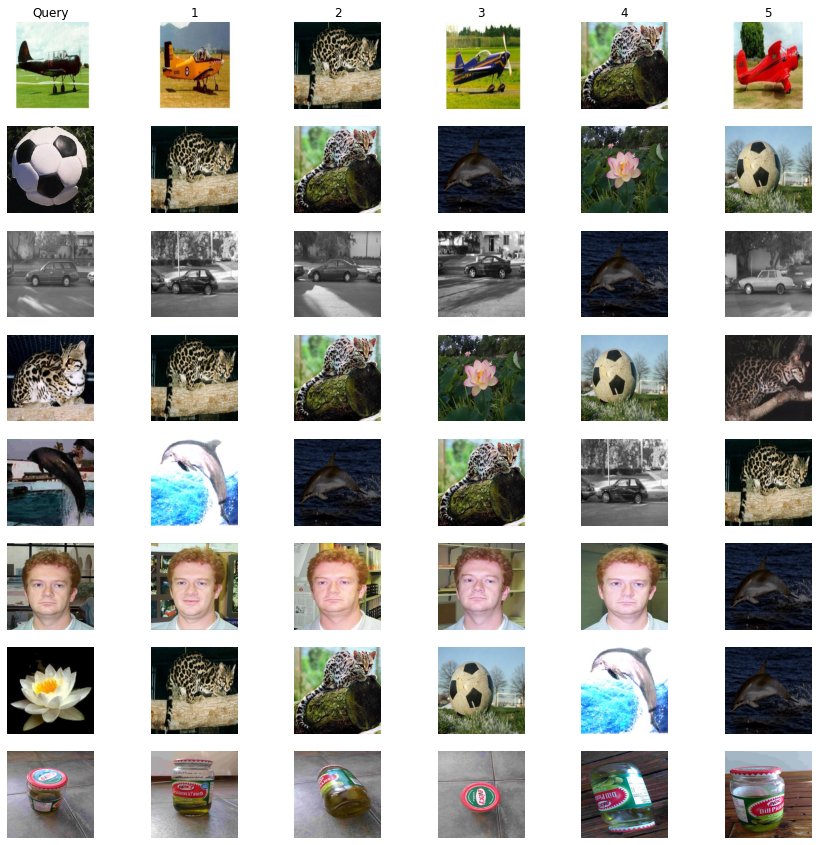

In [98]:
fig = plt.figure(figsize=[15, 15])
rows = 8
columns = 6
current_subplot = 0

for current_row in range(8):
    current_subplot += 1
    fig.add_subplot(rows, columns, current_subplot)
    plt.imshow(cv2.cvtColor(query_all[current_row], cv2.COLOR_BGR2RGB ))
    plt.axis("off")
    if current_row == 0 :
        plt.title("Query")

    for i in range(5):
        current_subplot += 1
        fig.add_subplot(rows, columns, current_subplot)
        plt.imshow(cv2.cvtColor(images[sorted_images_all[current_row][i]], cv2.COLOR_BGR2RGB ))
        plt.axis("off")
        
        if current_row == 0 :
            plt.title(i+1)